In [18]:
# Import the necessary functions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import plot_confusion_matrix


iris = pd.DataFrame(load_iris()['data'])
data = load_iris(return_X_y=True, as_frame=True)[0]
target = load_iris(return_X_y=True, as_frame=True)[1]

In [19]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [20]:
data
scaled = pd.DataFrame(StandardScaler().fit(data).transform(data))
scaled.columns = list(data.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
X_trs, X_tes, y_trs, y_tes = train_test_split(scaled, target, test_size=0.3)

In [22]:
max_k = int(len(X_test)/len(np.unique(y_test)))
max_k

15

In [23]:
def KNN(X_train, X_test, y_train, y_test, max_k, min_k=1):
    for i in range(min_k, max_k+1):
        if i % 2 != 0:
            model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
            print(f"{i}: {model.score(X_test, y_test)}")

regular_data = KNN(X_train, X_test, y_train, y_test, 15)
regular_data

1: 0.9333333333333333
3: 0.9333333333333333
5: 0.9333333333333333
7: 0.9555555555555556
9: 0.9777777777777777
11: 0.9777777777777777
13: 0.9777777777777777
15: 0.9777777777777777


In [24]:
scaled_data = KNN(X_trs, X_tes, y_trs, y_tes, 15)

1: 0.9555555555555556
3: 0.9777777777777777
5: 0.9777777777777777
7: 1.0
9: 1.0
11: 0.9777777777777777
13: 0.9777777777777777
15: 1.0


In [25]:
from sklearn.metrics import plot_confusion_matrix

final_model = KNeighborsClassifier(n_neighbors=9).fit(X_trs, y_trs)
predictions = final_model.predict(X_tes)

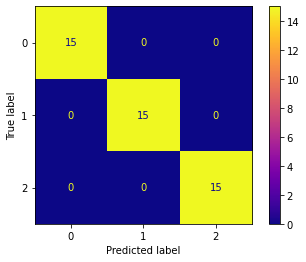

In [26]:
plot_confusion_matrix(final_model, X_tes, y_tes, cmap='plasma')